# Using filters for data exploration and visualization

Using files RegularSeasonCompactResults.csv and Teams.csv from the CSV folder

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# Using RegularSeasonCompactResults.csv

data = pd.read_csv("../CSVs/RegularSeasonCompactResults.csv")  # Reading the data
filter_match = data["Wscore"]==data["Lscore"]  # Creating a filter to see if there are any draw matches
print('The length of the dataframe is: ')
print(len(data[filter_match]))  # Applying the filter to the dataframe and printing the results

The length of the dataframe is: 
0


From the data we can find that the data is null and that we don't have any matches where there are draws.

In [13]:
# Using RegularSeasonCompactResults.csv

# Creating filters to display the data of team 1368 for the 2013 season
filter_1 = data["Wteam"]==1368
filter_2 = data["Season"]==2013
print(data[filter_1 & filter_2])

        Season  Daynum  Wteam  Wscore  Lteam  Lscore Wloc  Numot
126130    2013      61   1368      72   1146      68    H      0
126195    2013      63   1368      67   1249      63    A      0
126452    2013      68   1368      70   1311      65    H      0
126970    2013      80   1368      69   1358      65    H      0
127100    2013      82   1368      67   1394      53    H      0
127285    2013      87   1368      70   1146      69    A      0
127732    2013      96   1368      73   1311      62    A      0
128068    2013     103   1368      54   1372      50    H      0
128864    2013     122   1368      79   1270      68    H      0
128981    2013     124   1368      86   1249      72    H      0
129120    2013     129   1368      85   1270      65    N      0


In [14]:
# Using RegularSeasonCompactResults.csv & Teams.csv
# 1- Load and merge both dataframes
# 2- Where the merge is on WinningTeamId (RegularSeasonCompactResults) and TeamId (Teams.csv)
# 3- Name the dataframe: DFCombined
# 4- Show the top 3 rows (4 marks)
# TODO: Your code should be here

# Merging the two dataframes 
data = pd.read_csv("../CSVs/RegularSeasonCompactResults.csv")
data2 = pd.read_csv("../CSVs/Teams.csv")
DFCombined = pd.merge(data, data2, left_on="Wteam", right_on="Team_Id")
DFCombined.head(3)

,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot,Team_Id,Team_Name
0,1985,20,1228,81,1328,64,N,0,1228,Illinois
1,1985,25,1228,64,1226,44,N,0,1228,Illinois
2,1985,27,1228,75,1332,72,N,3,1228,Illinois


# **Question 2 - Visualizations**

## **Part I** 

Using the following dataset: https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv choose the most convenient graph to show the following, each question in **one** graph, using the library of your choice:
(18 Marks)


**1. The relationship between the penguin's bill length and bill depth for each species.** (5 marks)

In [17]:
## TODO: Check your attributes, make a graph using Matplotlib or Seaborn to show the relationship needed
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
penguin_data = pd.read_csv(url)
penguin_data.head(3)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE


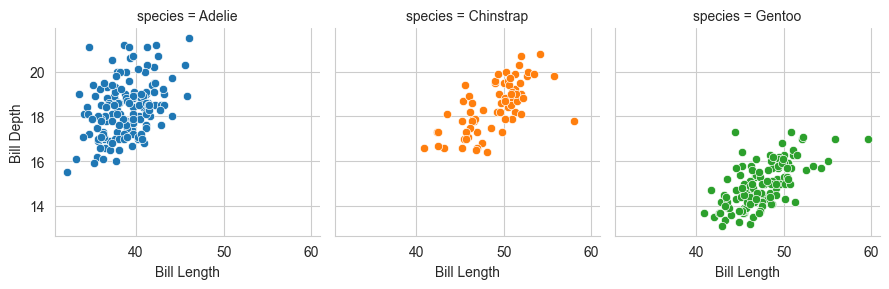

In [18]:
chart = sns.FacetGrid(penguin_data, col='species', hue='species')
chart.map(sns.scatterplot, "bill_length_mm", "bill_depth_mm")
chart.set_axis_labels(x_var='Bill Length', y_var='Bill Depth')

 **What do you observe from the graph?** (2 marks)

Your answer here:

* From the above scatter plot, we can observe that there is no high correlation between the Adelie and Chinstrap species but there is bit stronger correlation between the Bill Length and the Bill Depth with the Gentoo Species.



**Why did you choose this type of graph?** (2 marks)

Your answer here:

* I chose a scatter plot because it is the best way to represent a correlation between two variables.  

**2. Suitable graph of the mean BMI (BMI not body_mass weight_in_kg/height(m2)) of female and male penguins. (Assume the height is the flipper length)**  (5 marks)


In [19]:
penguin_data['BMI'] = (penguin_data['body_mass_g']/1000)/((penguin_data['flipper_length_mm']/1000)*penguin_data['flipper_length_mm']/1000)
penguin_data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,BMI
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE,114.465370
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE,109.839288
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE,85.470085
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE,92.619936


[Text(0.5, 1.0, 'Mean BMI comparison between Genders of Penguins')]

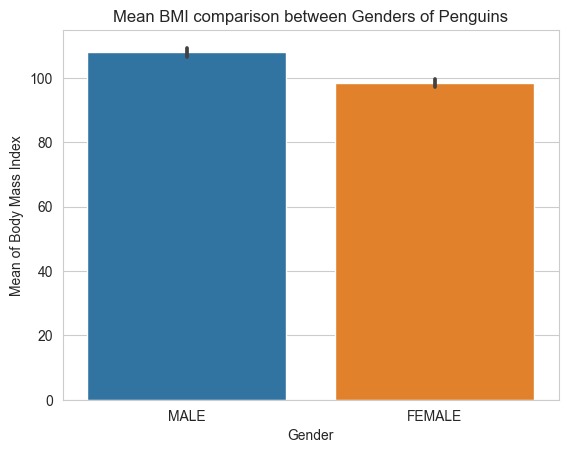

In [20]:
bar_plot = sns.barplot(x= 'sex', y='BMI', data=penguin_data)
bar_plot.set(xlabel='Gender', ylabel='Mean of Body Mass Index')
bar_plot.set(title='Mean BMI comparison between Genders of Penguins')

 **What do you observe from the graph?** (2 marks)

Your answer here:

*   From the above graph, you could clearly see that the Male penguin population has more BMI when you consider the mean of the BMI

**Why did you choose this type of graph?** (2 marks)

Your answer here:

* I chose a barplot because it's easier to compare the accumulated value between two different variables. 
* Also seaborn calculates the mean by aggregating the values for each sex.



## **Part II**

You can find the csv file that contains the museum visitors data here: ./CSVs/museum_visitors.csv
(8 marks)

Review the data by taking a look at a few of the rows.

In [21]:
# Solution
# Creating a dataframe by reading the data from a CSV file
museum_data = pd.read_csv('./CSVs/museum_visitors.csv', parse_dates=True, index_col=0)
# Printing out the first 5 rows
museum_data.head(5)

,Avila Adobe,Firehouse Museum,Chinese American Museum,America Tropical Interpretive Center
Date,,,,
2014-01-01,24778,4486,1581,6602
2014-02-01,18976,4172,1785,5029
2014-03-01,25231,7082,3229,8129
2014-04-01,26989,6756,2129,2824
2014-05-01,36883,10858,3676,10694


Convince the museum board 

The Firehouse Museum claims they ran an event in 2014 that brought an incredible number of visitors, and that they should get extra budget to run a similar event again.  The other museums think these types of events aren't that important, and budgets should be split purely based on recent visitors on an average day.  

To show the museum board how the event compared to regular traffic at each museum, create a suitable chart that shows how the number of visitors to each museum evolved over time.
(4 marks)

Text(0.5, 0, 'Date')

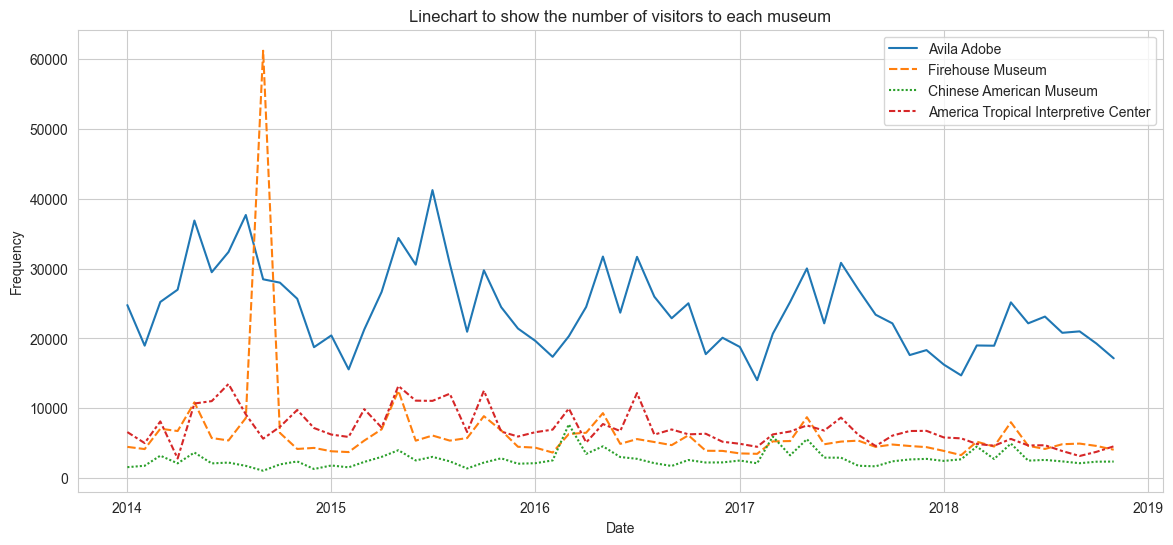

In [22]:
# Solution
# Setting the width and the height of the figure
plt.figure(figsize=(14,6))
# Adding the title of the graph
plt.title('Linechart to show the number of visitors to each museum')
# Generating the Line graph using seaborn
sns.lineplot(data=museum_data)
# Label across the Y-Axis
plt.ylabel('Frequency')
# Label across the X-Axis
plt.xlabel('Date')

What did you observe from the graph? (2 marks)

Your answer here

* From the above observation we could see that the traffic that generated from the event towards the end of the year 2014 was huge and organizing a similar event can prove to be beneficial for the museum. We were also able to observe that no other museum other than the Firehouse museum were able to generate such a huge margin in the number of visitors.

Why did you choose this type of graph? (2 marks)

You answer here

* I chose a line graph as the data deals with the passage of time. To observe a data that happens over a period of time, it's easier to analyze and observe multiple variables with a line graph.
* I could've went with a bar plot as well, but it wouldn't be as intuitive as a line chart while dealing with time series data.
* I feel like a line chart is the best way to represent data that spans across a period of time.

## **PART III**

Using the file in ./CSVs/gas_prices.csv <br>
Use a suitable plot/graph that will show the relationship between the gas price for each country (vs others) over all years. (8 marks)

First, review the data by taking a look at a few of the rows.

In [23]:
# Your solution here
gas_price_data = pd.read_csv('./CSVs/gas_prices.csv', parse_dates=True, index_col=0)
gas_price_data.head()

,Australia,Canada,France,Germany,Italy,Japan,Mexico,South Korea,UK,USA
Year,,,,,,,,,,
1990-01-01,NaN,1.87,3.63,2.65,4.59,3.16,1.00,2.05,2.82,1.16
1991-01-01,1.96,1.92,3.45,2.90,4.50,3.46,1.30,2.49,3.01,1.14
1992-01-01,1.89,1.73,3.56,3.27,4.53,3.58,1.50,2.65,3.06,1.13
1993-01-01,1.73,1.57,3.41,3.07,3.68,4.16,1.56,2.88,2.84,1.11
1994-01-01,1.84,1.45,3.59,3.52,3.70,4.36,1.48,2.87,2.99,1.11


Then Plot using the most suitable plot on your opinion (5 marks)

<Axes: xlabel='Year'>

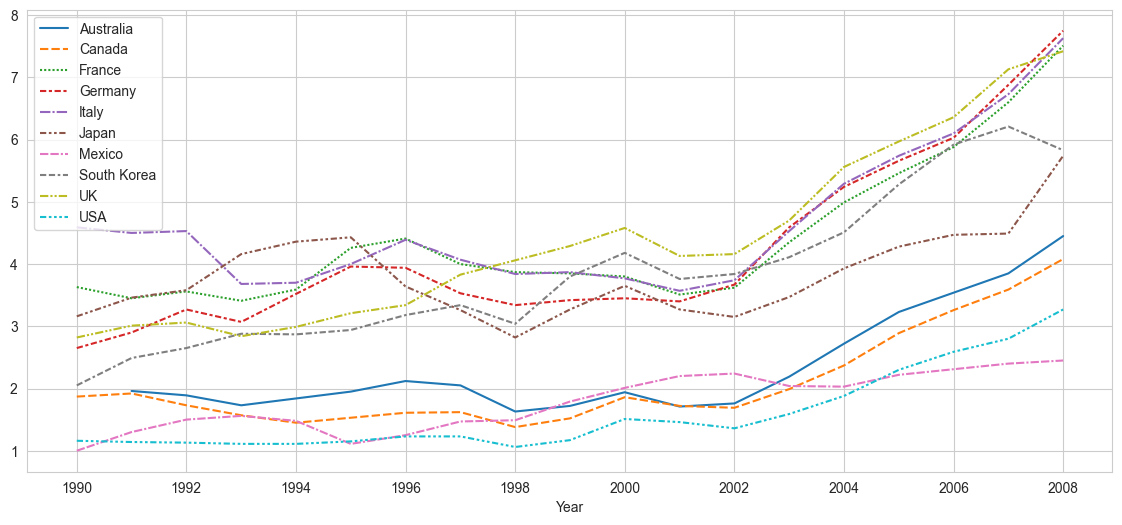

In [24]:
## Your solution here
plt.figure(figsize=(14, 6))
sns.lineplot(data=gas_price_data)

Your answer here

* From the above visualization you can clearly see that there is a rise in gas prices since 2002 in almost every country.
* I chose a line plot for this kind of a representation because Line plots are easier to understand time series data. It gives us a proper overview of how the data behaves in a certain period of time.